In [58]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [61]:
from keras.optimizers import RMSprop
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation

optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    
    model = Sequential()

    model.add(Conv2D(32, 3, padding='same', input_shape=train.shape[1:], activation='relu'))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("First layer...")
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("Second layer...")
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    #print("Third layer...")
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #print("Flattening, etc...")
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    print("Compiling model...")
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

print("Creating model:")
model = catdog()

Creating model:
Compiling model...


In [62]:
import os, random

TRAIN_DIR = 'data/image/animal/train2/'
TEST_DIR = 'data/image/animal/test2/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
random.shuffle(train_images)


/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


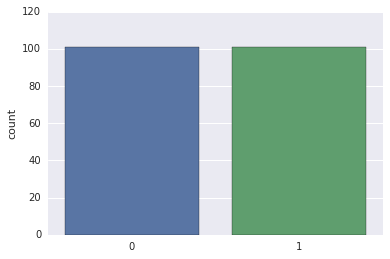

In [63]:
import seaborn as sns
%matplotlib inline 

def getLabels(list_of_images):
    labels = []
    
    for i in list_of_images:      
        if 'dog' in i:
            labels.append(1)
        else:
            labels.append(0)
    return labels

train_labels = getLabels(train_images)
test_labels= getLabels(test_images)
sns.countplot(train_label)



In [64]:
import cv2 
import numpy as np

ROWS = 64
COLS = 64
CHANNELS = 3

#We resize our image  to fixed spatial dimensions to ensure each and every image in the input dataset has the same 
#feature vector” size. Each image must be represented by a vector.

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    b,g,r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    return cv2.resize(img2, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prepare_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    return data

In [ ]:

train = prepare_data(train_images)
test = prepare_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 202
Processed 0 of 100
Train shape: (202, 3, 64, 64)
Test shape: (100, 3, 64, 64)


In [ ]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

epochs = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
       

history = LossHistory()
        
model.fit(train, train_labels, batch_size=batch_size, epochs=epochs,
              validation_split=0.25, verbose=2, shuffle=True, callbacks=[history, early_stopping])

Train on 151 samples, validate on 51 samples
Epoch 1/10
 - 4s - loss: 2.5509 - acc: 0.4901 - val_loss: 0.7114 - val_acc: 0.4902
